In [41]:
setwd("data")
wine <- read.table("wine.data.txt", header = FALSE, sep = ",")
str(wine)

'data.frame':	178 obs. of  14 variables:
 $ V1 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ V2 : num  14.2 13.2 13.2 14.4 13.2 ...
 $ V3 : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ V4 : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ V5 : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ V6 : int  127 100 101 113 118 112 96 121 97 98 ...
 $ V7 : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ V8 : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ V9 : num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ V10: num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ V11: num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ V12: num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ V13: num  3.92 3.4 3.17 3.45 2.93 2.85 3.58 3.58 2.85 3.55 ...
 $ V14: int  1065 1050 1185 1480 735 1450 1290 1295 1045 1045 ...


In [42]:
t <- c("class", "alco", "ma", "ash", "alc", "mg", "tp", "flav", "noflav",
       "proa", "col", "hue", "od", "prol")
names(wine) <- t
wine$class <- as.factor(wine$class)
head(wine)

,class,alco,ma,ash,alc,mg,tp,flav,noflav,proa,col,hue,od,prol
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


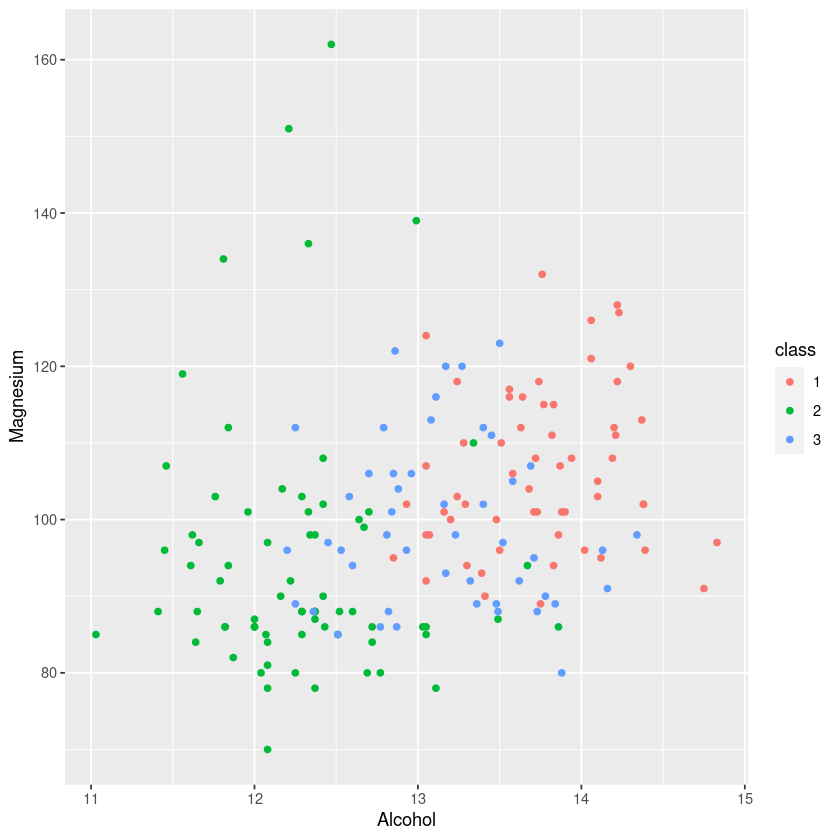

In [43]:
if (!require("ggplot2")){
    install.packages("ggplot2", dependencies = TRUE)
    library("ggplot2")
}
qplot(alco, mg, data = wine, col = class,  xlab = "Alcohol", ylab = "Magnesium")

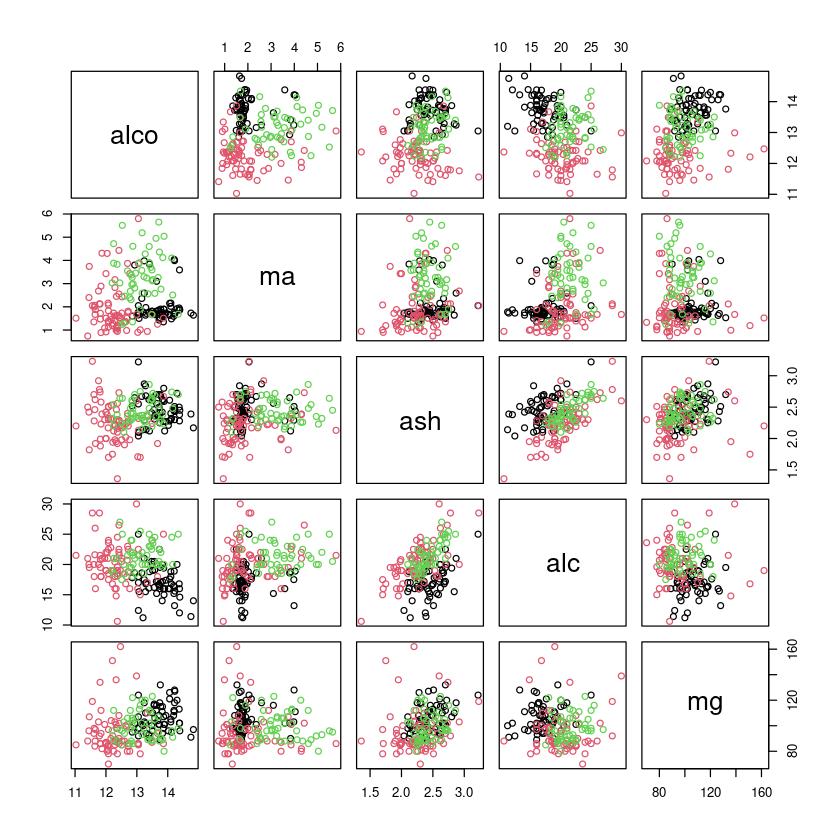

In [44]:
pairs(wine[, 2:6], col = wine$class)

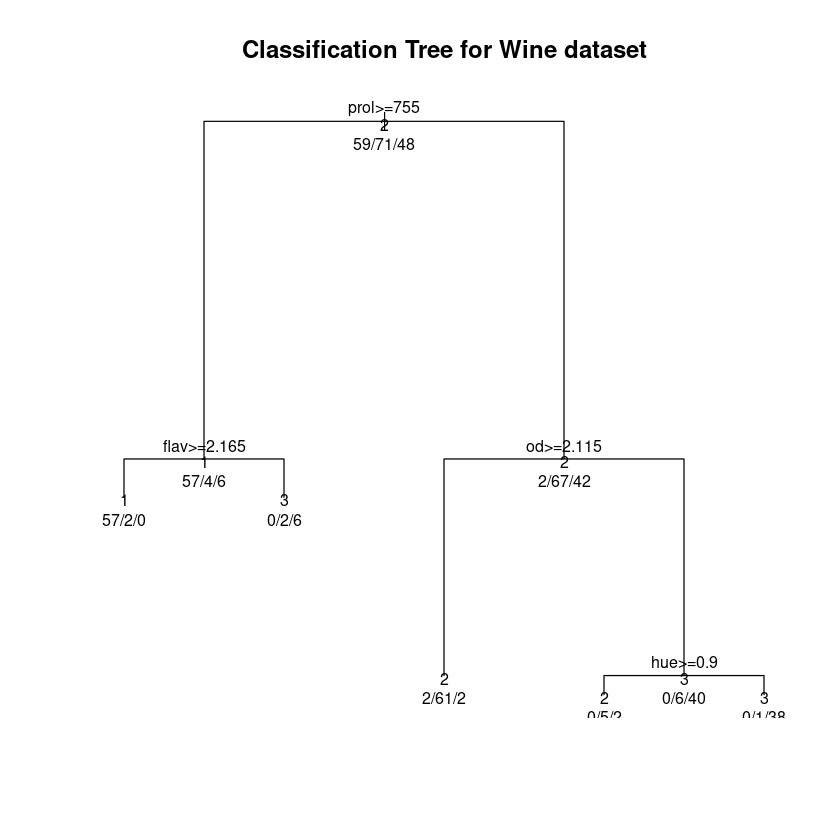

In [45]:
if (!require("rpart")){
    install.packages("rpart", dependencies = TRUE)
    library("rpart")
}

model <- rpart(class ~ ., data = wine, method = "class")
plot(model,  main = "Classification Tree for Wine dataset")
text(model, use.n = TRUE, all = TRUE, cex = .8)

In [46]:
printcp(model)


Classification tree:
rpart(formula = class ~ ., data = wine, method = "class")

Variables actually used in tree construction:
[1] flav hue  od   prol

Root node error: 107/178 = 0.60112

n= 178 

        CP nsplit rel error  xerror     xstd
1 0.495327      0   1.00000 1.00000 0.061056
2 0.317757      1   0.50467 0.47664 0.056376
3 0.056075      2   0.18692 0.31776 0.049015
4 0.028037      3   0.13084 0.22430 0.042587
5 0.010000      4   0.10280 0.18692 0.039378


In [47]:
set.seed(123)

train_indices <- sample(1:nrow(wine), size = floor(0.75 * nrow(wine)))

wine_train <- wine[train_indices, ]
wine_test <- wine[-train_indices, ]


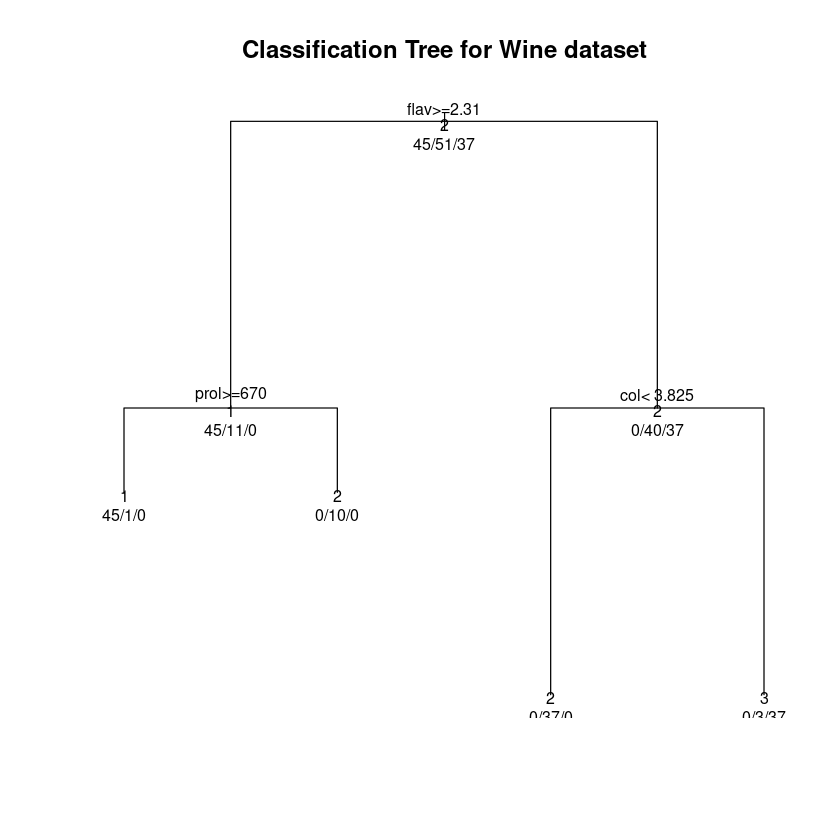

In [48]:
tree <- rpart(class ~ ., data = wine_train, method = "class")
plot(tree,  main = "Classification Tree for Wine dataset")
text(tree, use.n = TRUE, all = TRUE, cex = .8)

In [49]:
printcp(tree)


Classification tree:
rpart(formula = class ~ ., data = wine_train, method = "class")

Variables actually used in tree construction:
[1] col  flav prol

Root node error: 82/133 = 0.61654

n= 133 

       CP nsplit rel error  xerror     xstd
1 0.41463      0   1.00000 1.07317 0.066544
2 0.12195      2   0.17073 0.40244 0.060746
3 0.01000      3   0.04878 0.17073 0.043162


The variables used in tree construction changed from flav, hue, od, prol to col, flav, prol. Also the tree looks differently. First split on whole data is made by comparing prol to 755 and on train data – flaw to 2.31. Because the tree is different, the errors in each node are different.

In [50]:
predictions_vector <- predict(tree, newdata = wine_test)
head(predictions_vector)

,1,2,3
1,0.9782609,0.02173913,0
2,0.9782609,0.02173913,0
3,0.9782609,0.02173913,0
10,0.9782609,0.02173913,0
15,0.9782609,0.02173913,0
18,0.9782609,0.02173913,0


In [51]:
predictions_class <- predict(tree, newdata = wine_test, type = "class")
predictions_class

1   2   3  10  15  18  20  28  29  33  45  49  56  58  61  65  66  68  70  75 
  1   1   1   1   1   1   1   3   1   1   1   1   1   1   2   2   1   3   2   2 
 82  88  95  98 100 101 102 104 110 111 120 124 128 129 132 133 134 136 139 144 
  1   2   2   2   2   2   2   2   1   2   2   2   2   2   3   3   3   3   3   3 
151 155 157 164 178 
  3   3   3   3   3 
Levels: 1 2 3

With type = "vector" predict returns the matrix with probabilities for each class for a given example. With type = "class" it returns a vector with predicted class for each sample.

In [53]:
if (!require("caret")){
    install.packages("caret", dependencies = TRUE)
    library("caret")
}

confusion_matrix <- confusionMatrix(predictions_class, wine_test$class)
confusion_matrix

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 13  3  0
         2  0 16  0
         3  1  1 11

Overall Statistics
                                          
               Accuracy : 0.8889          
                 95% CI : (0.7595, 0.9629)
    No Information Rate : 0.4444          
    P-Value [Acc > NIR] : 5.846e-10       
                                          
                  Kappa : 0.8318          
                                          
 Mcnemar's Test P-Value : 0.1718          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9286   0.8000   1.0000
Specificity            0.9032   1.0000   0.9412
Pos Pred Value         0.8125   1.0000   0.8462
Neg Pred Value         0.9655   0.8621   1.0000
Prevalence             0.3111   0.4444   0.2444
Detection Rate         0.2889   0.3556   0.2444
Detection Prevalence   0.3556   0.3556   0.2889
Balanced Accuracy      0.9159   0.9000   0.9706

In [59]:
table(wine_train$class)


 1  2  3 
45 51 37 

In [54]:
library(mlr)

param_grid <- makeParamSet(
  makeNumericParam("cp", lower = 0.01, upper = 0.1),
  makeIntegerParam("minbucket", lower = 2, upper = 20)
)

task = makeClassifTask(data = wine_train, target = "class")

tuned_model <- tuneParams(
  learner = makeLearner("classif.rpart", predict.type = "response"), # model
  task = task,
  resampling = makeResampleDesc("CV", iters = 5),
  measures = list(mlr::acc),
  par.set = param_grid,
  control = makeTuneControlRandom(maxit = 100)  # strategia losowego strojenia
)

[Tune] Started tuning learner classif.rpart for parameter set:

             Type len Def      Constr Req Tunable Trafo
cp        numeric   -   - 0.01 to 0.1   -    TRUE     -
minbucket integer   -   -     2 to 20   -    TRUE     -

With control class: TuneControlRandom

Imputation value: -0

[Tune-x] 1: cp=0.0144; minbucket=13

[Tune-y] 1: acc.test.mean=0.8045584; time: 0.0 min

[Tune-x] 2: cp=0.0389; minbucket=12

[Tune-y] 2: acc.test.mean=0.8045584; time: 0.0 min

[Tune-x] 3: cp=0.0816; minbucket=3

[Tune-y] 3: acc.test.mean=0.8427350; time: 0.0 min

[Tune-x] 4: cp=0.0726; minbucket=20

[Tune-y] 4: acc.test.mean=0.8045584; time: 0.0 min

[Tune-x] 5: cp=0.035; minbucket=6

[Tune-y] 5: acc.test.mean=0.8427350; time: 0.0 min

[Tune-x] 6: cp=0.0243; minbucket=3

[Tune-y] 6: acc.test.mean=0.8732194; time: 0.0 min

[Tune-x] 7: cp=0.0602; minbucket=11

[Tune-y] 7: acc.test.mean=0.8045584; time: 0.0 min

[Tune-x] 8: cp=0.0545; minbucket=18

[Tune-y] 8: acc.test.mean=0.8045584; time: 0.0 min

In [56]:
tuned_model

Tune result:
Op. pars: cp=0.0209; minbucket=2
acc.test.mean=0.8806268

In [55]:
best_model <- tuned_model$learner

best_model_trained <- mlr::train(best_model, makeClassifTask(data = wine_train, target = "class"),)

predicted_classes <- predict(best_model_trained, newdata = wine_test, type="class")$data$response
confusion_matrix <- confusionMatrix(predicted_classes, wine_test$class)
confusion_matrix

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 13  3  0
         2  0 16  0
         3  1  1 11

Overall Statistics
                                          
               Accuracy : 0.8889          
                 95% CI : (0.7595, 0.9629)
    No Information Rate : 0.4444          
    P-Value [Acc > NIR] : 5.846e-10       
                                          
                  Kappa : 0.8318          
                                          
 Mcnemar's Test P-Value : 0.1718          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9286   0.8000   1.0000
Specificity            0.9032   1.0000   0.9412
Pos Pred Value         0.8125   1.0000   0.8462
Neg Pred Value         0.9655   0.8621   1.0000
Prevalence             0.3111   0.4444   0.2444
Detection Rate         0.2889   0.3556   0.2444
Detection Prevalence   0.3556   0.3556   0.2889
Balanced Accuracy      0.9159   0.9000   0.9706